# Neuroscape playground

In [5]:
# imports
from multiprocessing import Pool
import jax
import src
import importlib
from matplotlib import pyplot as plt
# black background

In [12]:
importlib.reload(src);
plt.style.use('dark_background')

In [7]:
n_steps = 200
n_samples = 100
batch_size = 32

In [8]:
args_list = ['--subject', 'subj05', '--batch_size', str(batch_size), '--n', str(n_samples), '--n_steps', str(n_steps)]
conf, args = src.get_config(), src.get_args(args_list)
train_loader, val_loader, _ = src.get_loaders(conf, args)
next(train_loader), next(val_loader);

100%|██████████| 100/100 [00:02<00:00, 34.56it/s]


In [9]:
rng = jax.random.PRNGKey(0)
params = src.init_params(conf['layer_sizes'], rng)
params, metrics = src.train(params, conf, args, train_loader, val_loader)

train loss: 0.1017, train acc: 0.9687, val loss: 0.1589, val acc: 0.9639: 100%|██████████| 200/200 [00:18<00:00, 10.99it/s]


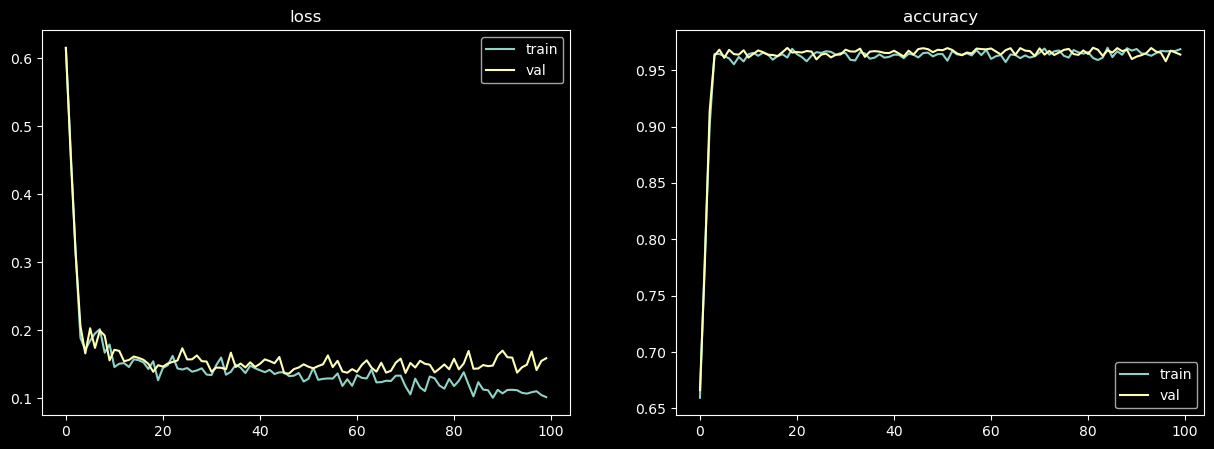

In [13]:
src.plot_metrics(metrics);